In [2]:
import pandas as pd

input_file = 'input/201jackpotjoanieDLC_resnet50_veloxDec16shuffle1_190000.h5'
input_file = 'input/Amiesdini111620DLC_resnet50_veloxDec16shuffle1_190000.h5'

In [ ]:
df = pd.read_hdf(input_file)
df

In [ ]:
# df.interpolate(method='quadratic', inplace=True)
# from pyts.datasets import load_basic_motions
#
# bunch = load_basic_motions()

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable
import numpy as np
from pyts.image import GramianAngularField
from pyts.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [5]:
from pyts.datasets import load_basic_motions
X, _, _, _ = load_basic_motions(return_X_y=True)
x = X[0]
n_features, n_timestamps = x.shape
n_features, n_timestamps

(6, 100)

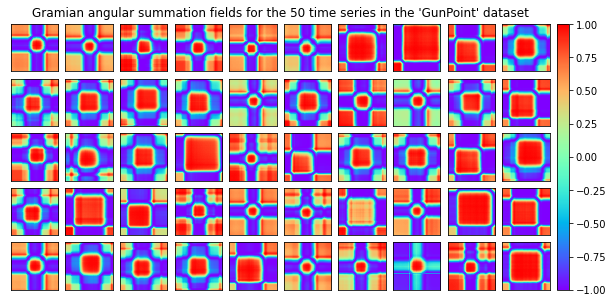

In [14]:
# gun model
# shape 50, 150 (50 samples with 150 timestamps)
from pyts.datasets import load_gunpoint
from pyts.image import GramianAngularField
X, _, _, _ = load_gunpoint(return_X_y=True)
# X[0]
transformer = GramianAngularField()
X_gaf = transformer.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()

In [19]:
from pyts.image import GramianAngularField
import numpy as np
X = np.array([
    [2, 0.5, 0, 2],
    [-4, -0.5, 0, -3] ,
    [0.75, 0, 0.5, 0.25],
    [0.75, 0, 0.5, 0.25],
     ])

gaf = GramianAngularField()
X_new = gaf.fit_transform(X)

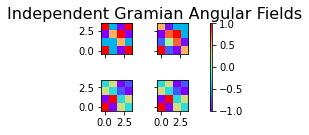

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(2, 2))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="4%",
                 cbar_pad=0.3,
                 )
for i, ax in enumerate(grid):
    im = ax.imshow(X_new[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
plt.colorbar(im, cax=grid.cbar_axes[0])
plt.suptitle('Independent Gramian Angular Fields', y=0.92, fontsize=16)
plt.subplots_adjust(hspace=0.8)
plt.savefig('img1.png')

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


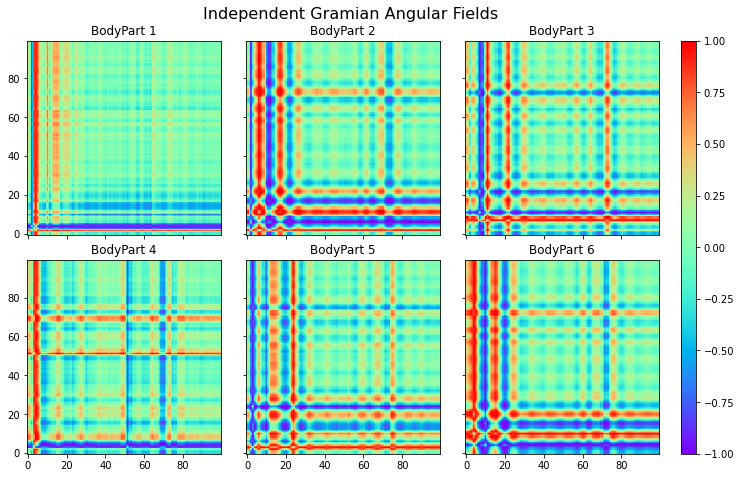

In [8]:


gaf = GramianAngularField(method='d')
x_gaf = gaf.transform(x)


# Plot the corresponding images
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 4),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="4%",
                 cbar_pad=0.3,
                 )
titles = [f'BodyPart {i}' for i in range(1, 7)]
for image, title, ax in zip(x_gaf, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower', vmin=-1, vmax=1)
    ax.set_title(title, fontdict={'fontsize': 12})
plt.colorbar(im, cax=grid.cbar_axes[0])
plt.suptitle('Independent Gramian Angular Fields', y=0.92, fontsize=16)
plt.subplots_adjust(hspace=0.8)

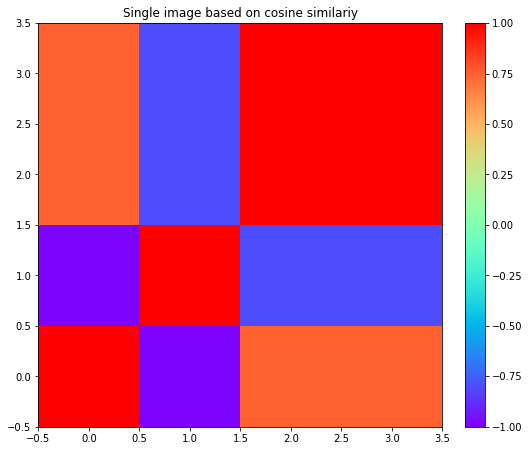

In [21]:
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
x_cosine = cosine_similarity(X.T)

# Plot the corresponding image
plt.figure(figsize=(8, 8))
plt.imshow(x_cosine, cmap='rainbow', origin='lower', vmin=-1, vmax=1)
plt.colorbar(fraction=0.0452)
plt.title('Single image based on cosine similariy', fontsize=12)
plt.show()

(4, 4)


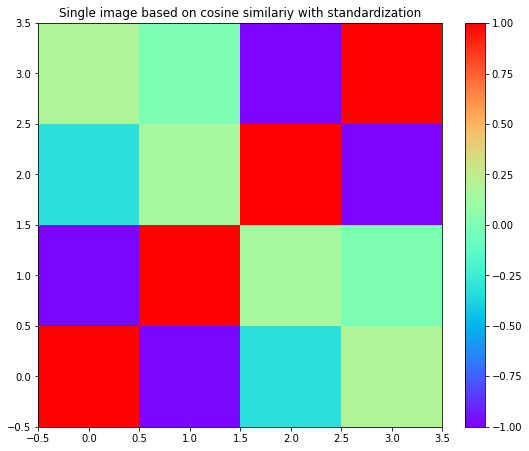

In [23]:
from pyts.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
scaler = StandardScaler()
x_scaled = scaler.transform(X)
print(x_scaled.shape)
x_scaled_cosine = cosine_similarity(x_scaled.T)
plt.figure(figsize=(8, 8))
plt.imshow(x_scaled_cosine, cmap='rainbow', origin='lower', vmin=-1, vmax=1)
plt.colorbar(fraction=0.0452)
plt.title('Single image based on cosine similariy with standardization', fontsize=12)
plt.show()